# 1_ Prediction using Supervised ML 

# Predict the percentage of an student based on the no. of study hours. 


First import the all libraries which are required

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read the data from the URL

In [ ]:
data =pd.read_csv('http://bit.ly/w-data')

In [85]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [63]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [66]:
print(data.shape)

(25, 2)


Plot the data

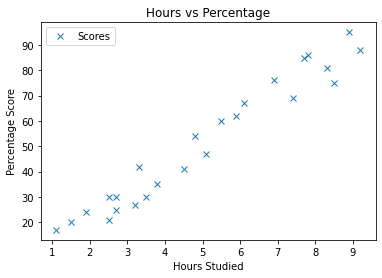

In [67]:
data.plot(x='Hours',y='Scores',style='x')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# Data preparation for training

Now split the data into X and Y variables

In [68]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Split the data into train and test set.

since the dataset is very small I am not using validation set

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model defining and training

Import the Linear Regression model from the sklearn and train the model

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [48]:
regressor.coef_

array([9.68207815])

In [49]:
regressor.intercept_

2.826892353899737

# Predicting the Testset

In [76]:
y_pred = regressor.predict(x_test)

In [77]:
prdicted_df =pd.DataFrame({'Actual': y_test.flatten(),'Predicted': y_pred.flatten()})
prdicted_df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Plot the testset and trainset across the Regression line

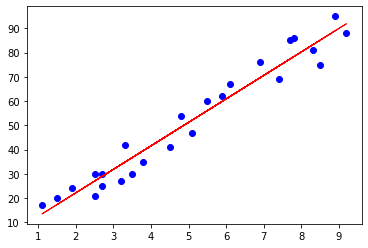

In [81]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y, color='blue')
plt.plot(X, line,color='red',linewidth=1);
plt.show()

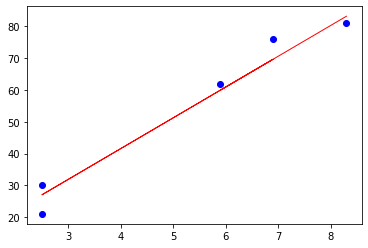

In [82]:
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,y_pred, color='red',linewidth=1)
plt.show()

# Evaluate the Model

Now Evaluate the Model by uisng standard Metrics

In [83]:
from sklearn import metrics
print('Mean absolute error :', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error :', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error : 3.9207511902099244
Mean squared error : 18.943211722315272
Root Mean squared error : 4.352380006653288
